# Netflix Dataset EDA
This notebook aims to conduct a comprehensive exploratory data analysis (EDA) on the Netflix dataset. The objectives include identifying trends, outliers, and correlations using visualizations, and suggesting initial hypotheses for modeling.

## Objectives
1. Conduct a comprehensive EDA on the dataset.
2. Identify trends, outliers, and correlations using visualizations.
3. Suggest initial hypotheses for modeling.

## Dataset Overview
The dataset contains information about Netflix titles, including movies and TV shows. It includes attributes such as title, director, cast, release year, and more.

### Steps to Follow
1. Load and inspect the dataset.
2. Handle missing values and clean the data.
3. Perform univariate, bivariate, and multivariate analysis.
4. Create visualizations to identify trends and patterns.
5. Summarize insights and propose hypotheses.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv('netflix_titles.csv')

# Display the shape of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

df.head()

Dataset contains 8807 rows and 12 columns.


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
# Step 2: Handle Missing Values
print("\nMissing Values in Each Column:\n")
print(df.isnull().sum())




Missing Values in Each Column:

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [4]:
# Handle Missing Values Based on Analysis
# Replace missing values in 'director' and 'cast' with 'Unknown'
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)

# Replace missing values in 'country' with 'Unknown'
df['country'].fillna('Unknown', inplace=True)

# Replace missing values in 'date_added' with 'Not Available'
df['date_added'].fillna('Not Available', inplace=True)

# Replace missing values in 'rating' and 'duration' with the most frequent value
df['rating'].fillna(df['rating'].mode()[0], inplace=True)
df['duration'].fillna(df['duration'].mode()[0], inplace=True)

# Verify if all missing values are handled
print("\nRemaining Missing Values in Each Column:\n")
print(df.isnull().sum())


Remaining Missing Values in Each Column:

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [5]:
# Check and Correct Data Types
# Display current data types
print("\nCurrent Data Types:\n")
print(df.dtypes)

# Convert 'date_added' to datetime format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Ensure 'release_year' is an integer
df['release_year'] = df['release_year'].astype(int)

# Convert categorical columns to category type
categorical_columns = ['type', 'rating', 'country']
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Verify updated data types
print("\nUpdated Data Types:\n")
print(df.dtypes)


Current Data Types:

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Updated Data Types:

show_id                 object
type                  category
title                   object
director                object
cast                    object
country               category
date_added      datetime64[ns]
release_year             int32
rating                category
duration                object
listed_in               object
description             object
dtype: object

Updated Data Types:

show_id                 object
type                  category
title                   object
director                object
cast                    object
country               category
date_added      datetime64[ns]
release_year             int32
rating    

# Univariate Analysis


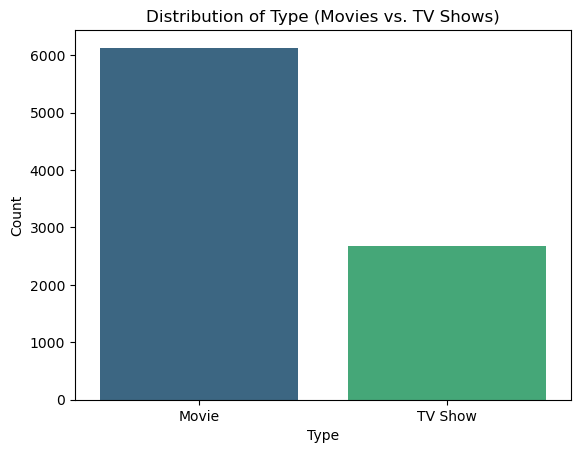

In [6]:
# Analyze the 'type' column
sns.countplot(data=df, x='type', palette='viridis')
plt.title('Distribution of Type (Movies vs. TV Shows)')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

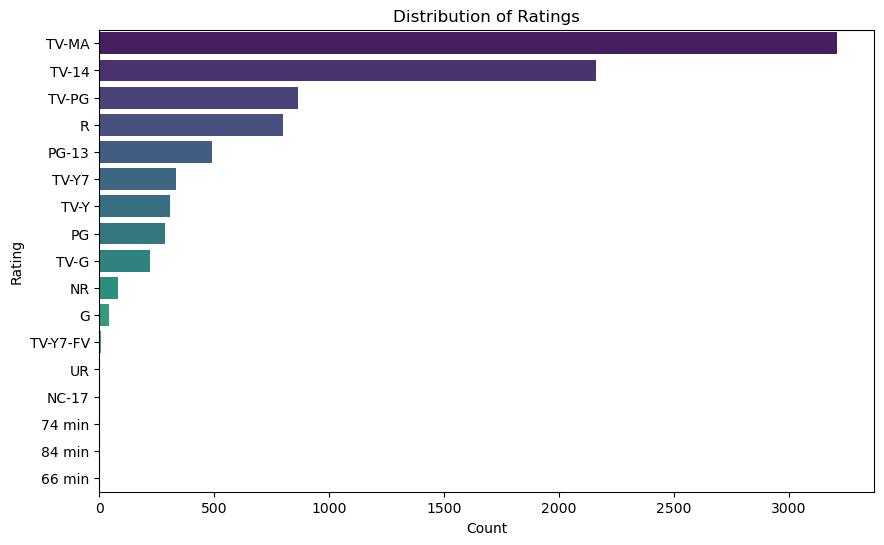

In [7]:
# Analyze the 'rating' column
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()

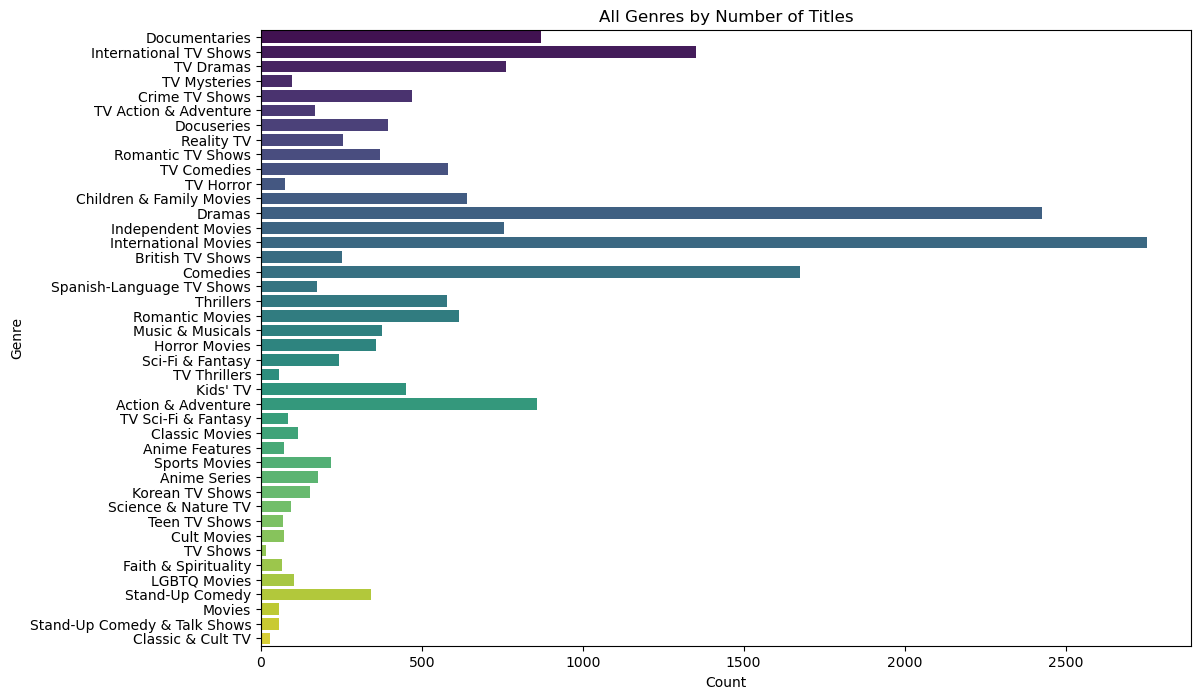

In [8]:
# Analyze the 'listed_in' column (All genres)
from collections import Counter

# Split genres and count occurrences
all_genres = df['listed_in'].dropna().str.split(', ').sum()
genre_counts = Counter(all_genres)

# Prepare data for visualization
genres, counts = zip(*genre_counts.items())
plt.figure(figsize=(12, 8))
sns.barplot(x=list(counts), y=list(genres), palette='viridis')
plt.title('All Genres by Number of Titles')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

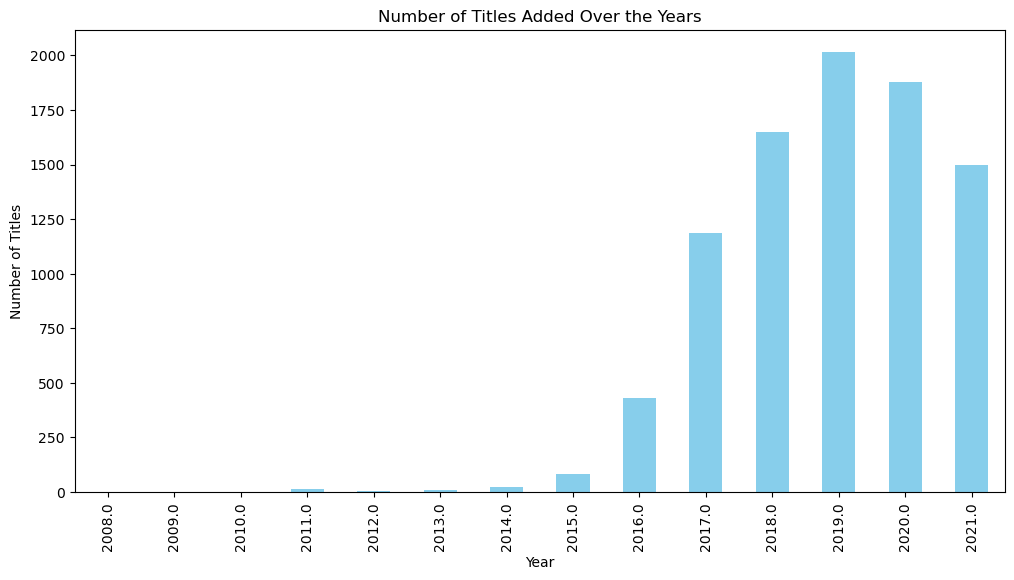

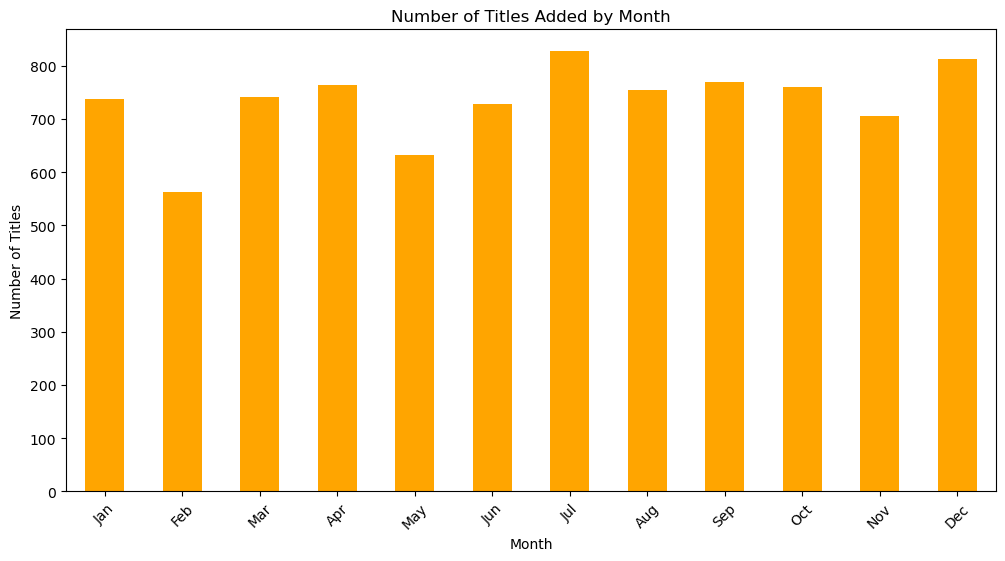

In [9]:
# Analyze the 'date_added' column (Distribution over time)
plt.figure(figsize=(12, 6))
df['date_added'].dt.year.value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Number of Titles Added Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

# Analyze the 'date_added' column (Monthly distribution)
plt.figure(figsize=(12, 6))
df['date_added'].dt.month.value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Number of Titles Added by Month')
plt.xlabel('Month')
plt.ylabel('Number of Titles')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

## Bivariate Analysis: Type vs. Rating

In this section, we will analyze the relationship between `Type` (Movies vs. TV Shows) and `Rating`. This will help us understand how ratings are distributed across the two types of content.

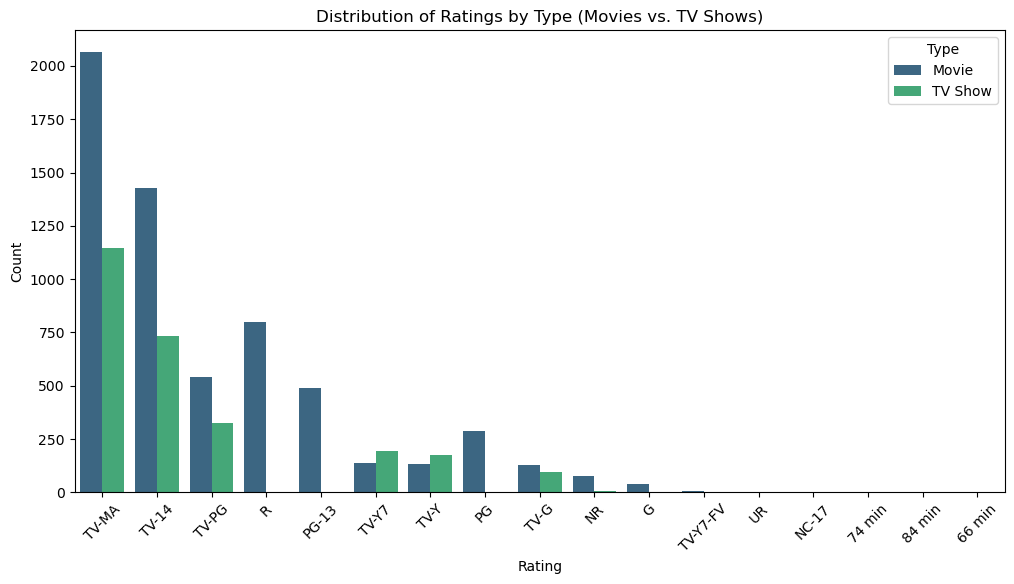

In [10]:
# Analyze the relationship between Type and Rating
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='rating', hue='type', palette='viridis', order=df['rating'].value_counts().index)
plt.title('Distribution of Ratings by Type (Movies vs. TV Shows)')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.show()

## Bivariate Analysis: Country vs. Type

In this section, we will analyze the distribution of Movies and TV Shows across different countries. This will help us understand which countries produce more Movies or TV Shows.

<Figure size 1400x800 with 0 Axes>

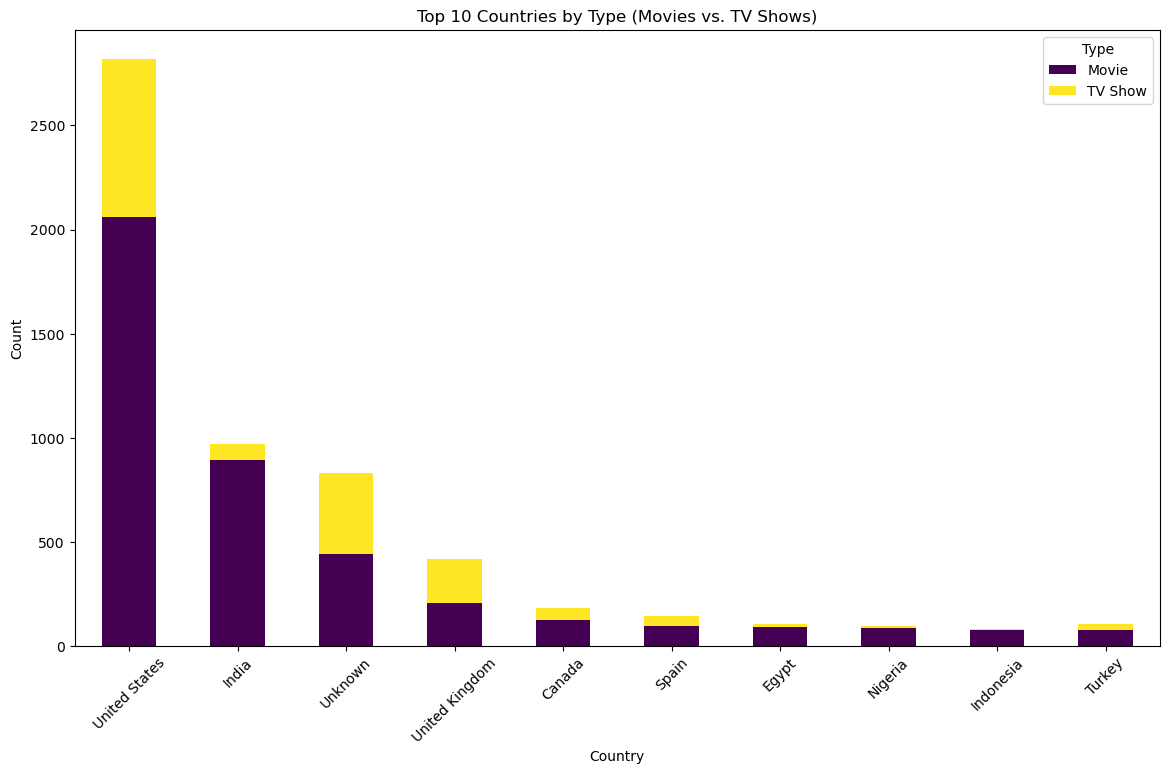

In [11]:
# Analyze the distribution of Movies and TV Shows across countries
plt.figure(figsize=(14, 8))
country_type_counts = df.groupby(['country', 'type']).size().unstack()
country_type_counts = country_type_counts.fillna(0).sort_values(by='Movie', ascending=False).head(10)

country_type_counts.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Top 10 Countries by Type (Movies vs. TV Shows)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.show()

## Bivariate Analysis: Release Year vs. Type

In this section, we will explore trends in the release year for Movies and TV Shows. This will help us understand how the production of Movies and TV Shows has evolved over time.

<Figure size 1400x800 with 0 Axes>

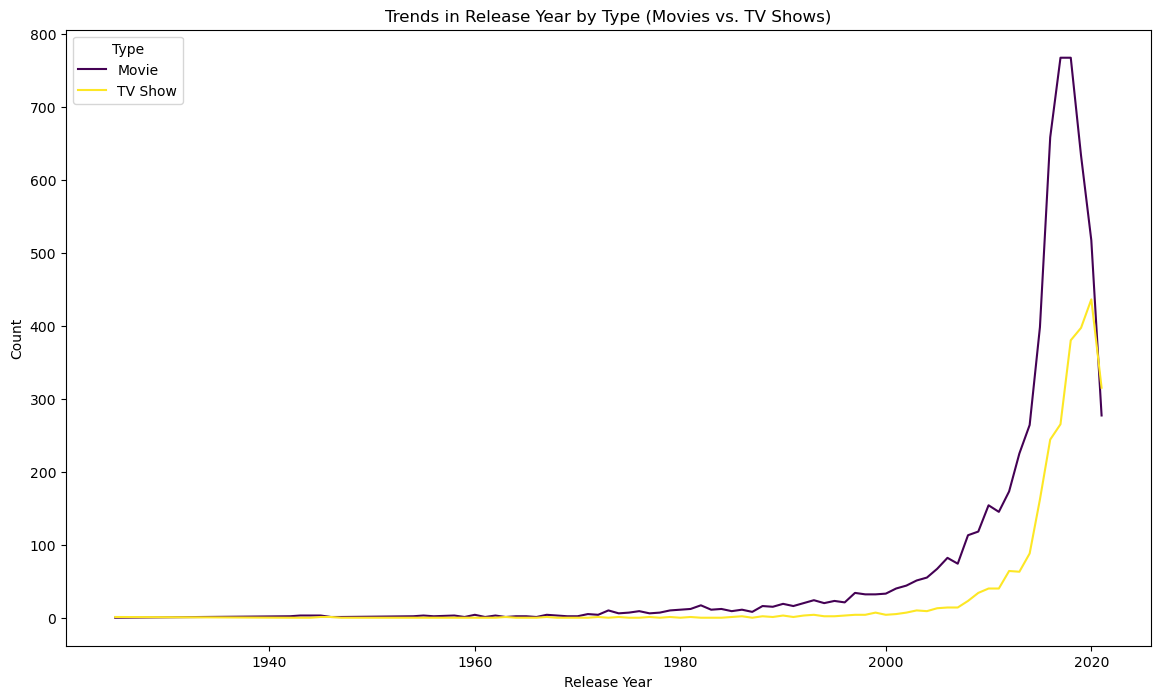

In [12]:
# Analyze trends in release year for Movies and TV Shows
plt.figure(figsize=(14, 8))
release_year_type_counts = df.groupby(['release_year', 'type']).size().unstack()
release_year_type_counts.plot(kind='line', figsize=(14, 8), colormap='viridis')
plt.title('Trends in Release Year by Type (Movies vs. TV Shows)')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend(title='Type')
plt.show()

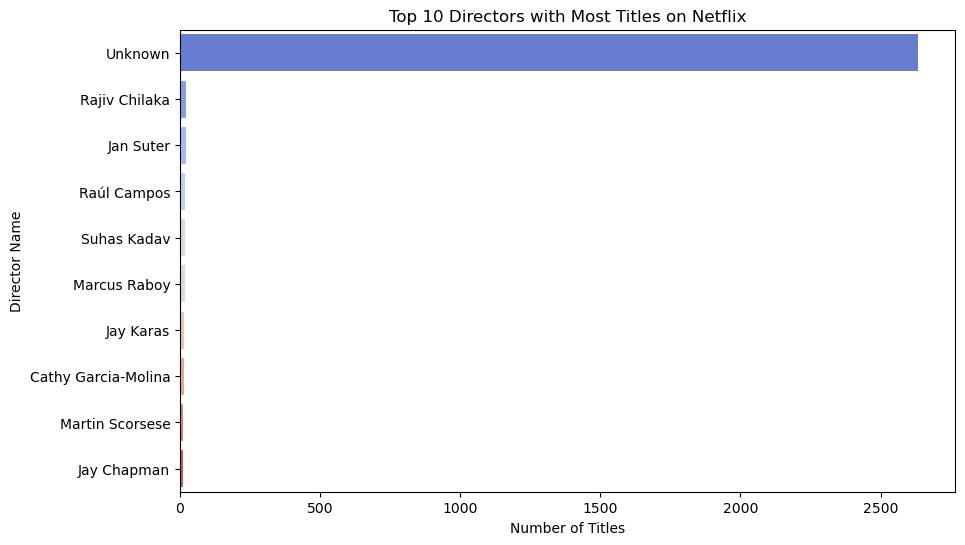

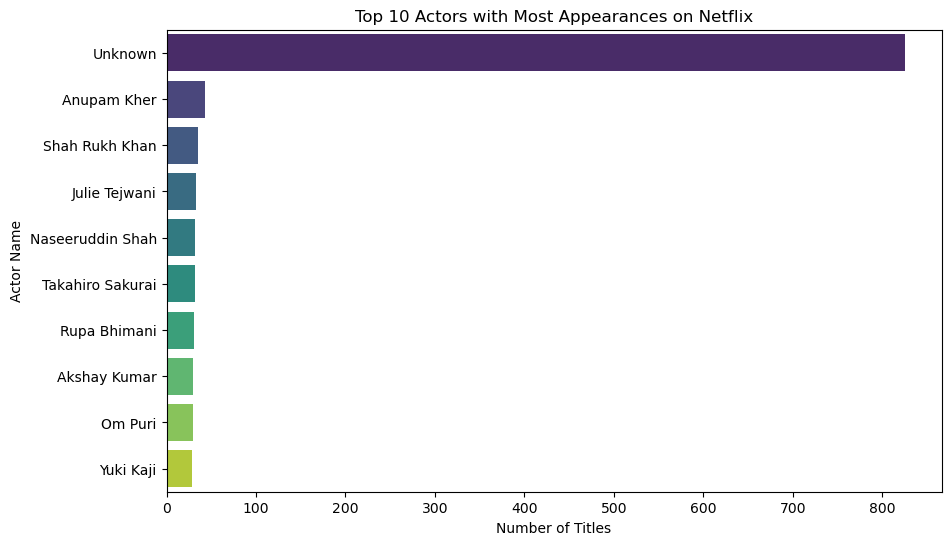

In [14]:
# Drop null values in 'director'
directors = df['director'].dropna().str.split(',').explode().str.strip()

# Count top 10 directors
top_directors = directors.value_counts().head(10)

# Visualize
plt.figure(figsize=(10,6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='coolwarm')
plt.title('Top 10 Directors with Most Titles on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director Name')
plt.show()

# Drop nulls from 'cast'
actors = df['cast'].dropna().str.split(',').explode().str.strip()

# Count top 10 actors
top_actors = actors.value_counts().head(10)

# Visualize
plt.figure(figsize=(10,6))
sns.barplot(x=top_actors.values, y=top_actors.index, palette='viridis')
plt.title('Top 10 Actors with Most Appearances on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Actor Name')
plt.show()


# Top content creators - Insigths and visuals

1. Identify and visualize the top 10 directors with the most titles on Netflix.
2. Find and visualize the top 10 actors who have appeared in the most content.

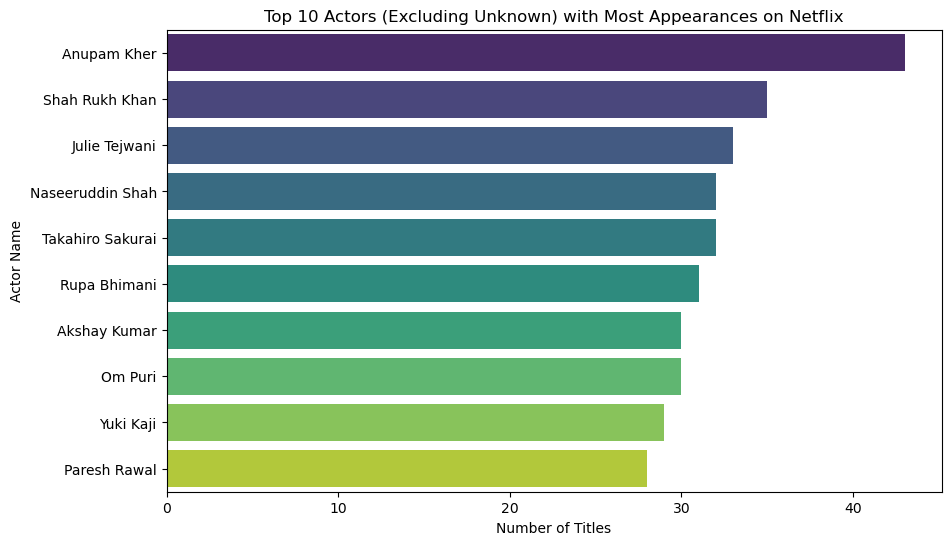

In [15]:
# Clean and remove 'Unknown' or blank
actors_clean = df['cast'].dropna().str.split(',').explode().str.strip()
actors_clean = actors_clean[actors_clean.str.lower() != 'unknown']

# Top 10 actors
top_actors_cleaned = actors_clean.value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_actors_cleaned.values, y=top_actors_cleaned.index, palette='viridis')
plt.title('Top 10 Actors (Excluding Unknown) with Most Appearances on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Actor Name')
plt.show()


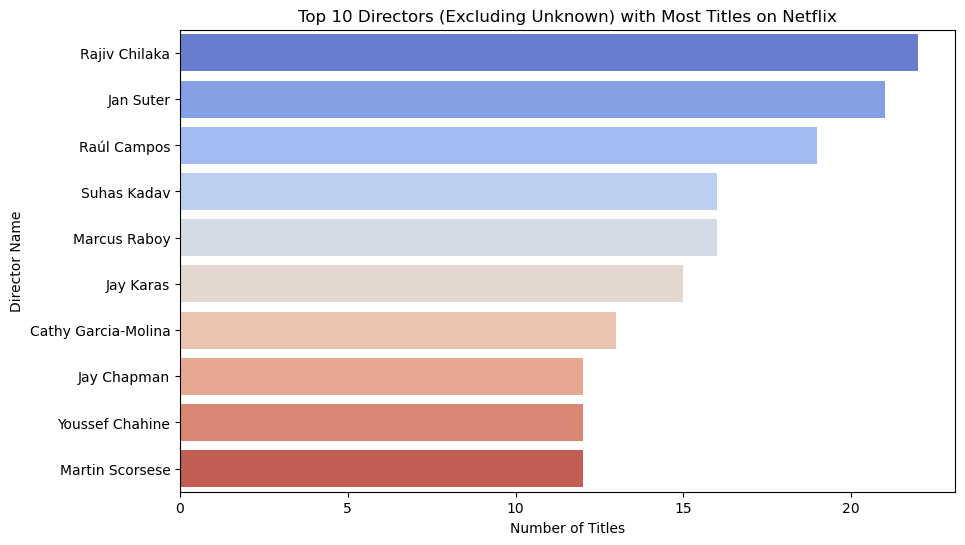

In [16]:
# Clean and remove 'Unknown' or blank
directors_clean = df['director'].dropna().str.split(',').explode().str.strip()
directors_clean = directors_clean[directors_clean.str.lower() != 'unknown']

# Top 10 directors
top_directors_cleaned = directors_clean.value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_directors_cleaned.values, y=top_directors_cleaned.index, palette='coolwarm')
plt.title('Top 10 Directors (Excluding Unknown) with Most Titles on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director Name')
plt.show()


### Multivariate Analysis – Country + Type + Rating



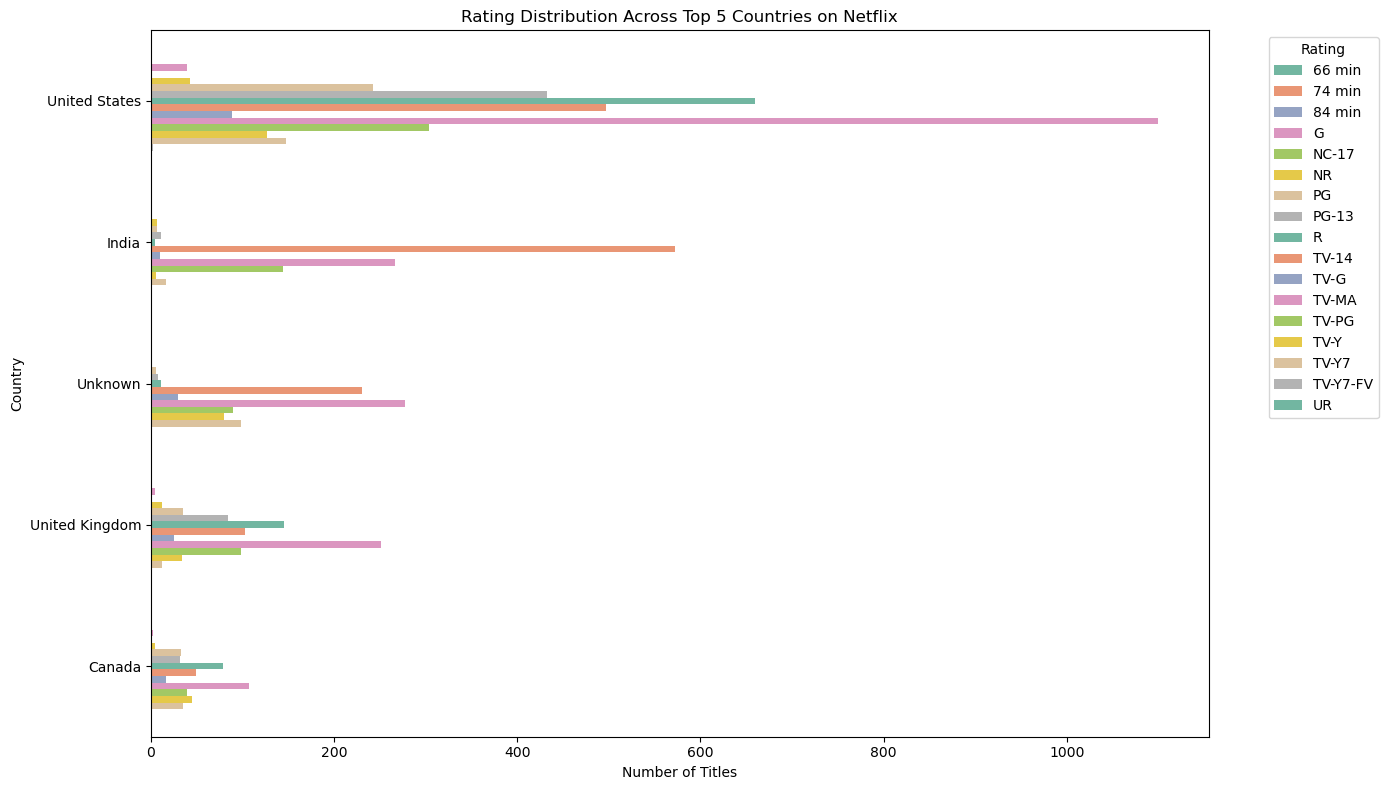

In [22]:
# Drop missing values for relevant columns
df_clean = df.dropna(subset=["country", "type", "rating"])

# Handle multiple countries (e.g., "United States, Canada") by splitting and exploding
df_clean["country"] = df_clean["country"].str.split(", ")
df_exploded = df_clean.explode("country")

# Get top 10 countries by content count
top_countries = df_exploded["country"].value_counts().head(5).index

# Filter for only top 10 countries
df_top_countries = df_exploded[df_exploded["country"].isin(top_countries)]

# Plot: Rating distribution across top 10 countries, grouped by Type
plt.figure(figsize=(14, 8))
sns.countplot(data=df_top_countries, 
              y="country", 
              hue="rating", 
              palette="Set2",
              order=top_countries)
plt.title("Rating Distribution Across Top 5 Countries on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.legend(title="Rating", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the plot if needed
plt.savefig("rating_distribution_top_5_countries.png", dpi=300)

plt.show()

## Multivariate Analysis: Type + Genre + Rating

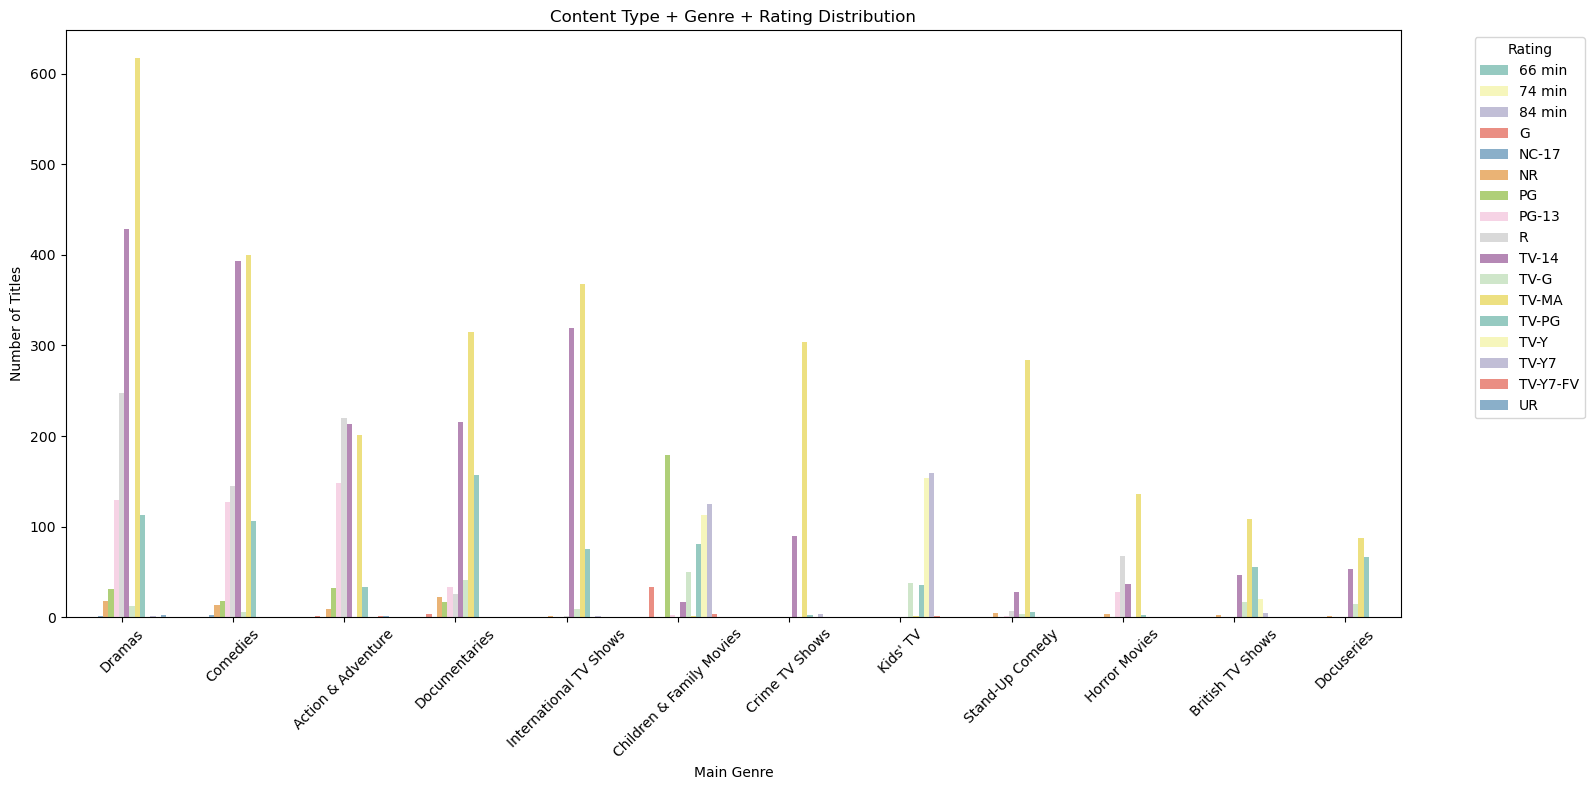

In [23]:
# Make a copy to work with
df_genre = df.copy()

# Drop missing values for rating, type, and listed_in (genres)
df_genre = df_genre.dropna(subset=["rating", "type", "listed_in"])

# Extract the first genre from 'listed_in'
df_genre["main_genre"] = df_genre["listed_in"].apply(lambda x: x.split(",")[0])

# Plot count of ratings across genres, split by content type
plt.figure(figsize=(16, 8))
sns.countplot(data=df_genre, 
              x="main_genre", 
              hue="rating", 
              palette="Set3",
              order=df_genre["main_genre"].value_counts().index[:12])
plt.title("Content Type + Genre + Rating Distribution")
plt.xlabel("Main Genre")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.legend(title="Rating", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the plot
plt.savefig("type_genre_rating_distribution.png", dpi=300)

plt.show()


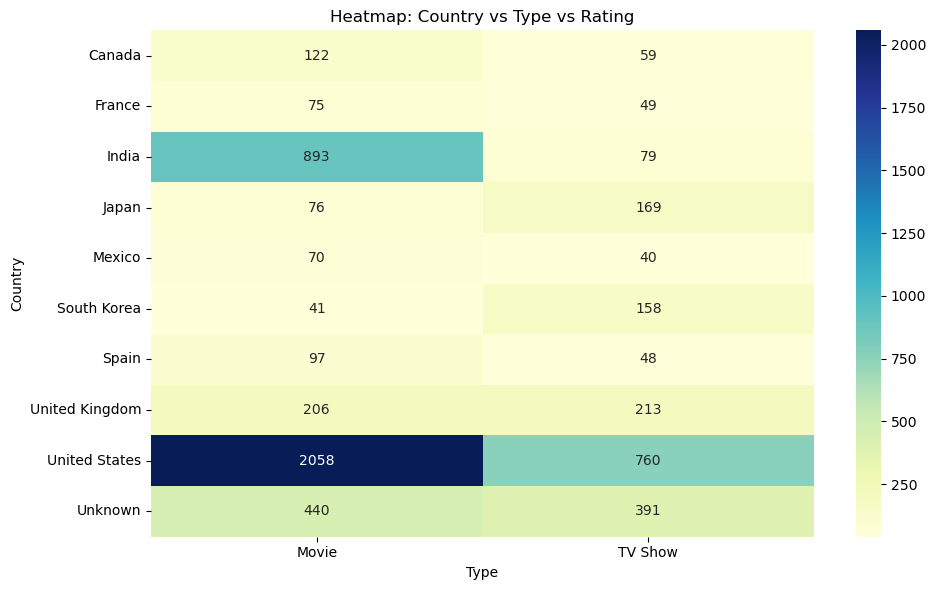

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df = pd.read_csv("netflix_titles.csv")

# Preprocess the data
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Unknown')
df['type'] = df['type'].fillna('Unknown')

# Filter top 10 countries for simplicity
top_countries = df['country'].value_counts().head(10).index
filtered_df = df[df['country'].isin(top_countries)]

# Create pivot table
heatmap_data = filtered_df.pivot_table(index='country', columns='type', values='rating', aggfunc='count')

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title("Heatmap: Country vs Type vs Rating")
plt.xlabel("Type")
plt.ylabel("Country")
plt.tight_layout()
plt.show()




In [27]:
import plotly.express as px

# Load data
df = pd.read_csv("netflix_titles.csv")

# Clean and process data
df['country'] = df['country'].fillna('Unknown')

# Some entries have multiple countries separated by commas, so split them
df_exploded = df.assign(country=df['country'].str.split(',')).explode('country')
df_exploded['country'] = df_exploded['country'].str.strip()

# Count number of titles per country
country_counts = df_exploded['country'].value_counts().reset_index()
country_counts.columns = ['country', 'title_count']

# Plot choropleth map
fig = px.choropleth(
    country_counts,
    locations='country',
    locationmode='country names',
    color='title_count',
    hover_name='country',
    color_continuous_scale='Reds',
    title='📺 Netflix Titles Distribution by Country'
)

fig.show()

# # 📊 Final Report: Exploratory Data Analysis on Netflix Titles Dataset

## 🔍 Objective
The primary objective of this exploratory data analysis (EDA) was to uncover trends, outliers, and correlations in Netflix content using various statistical and visual techniques. The dataset contains details about TV Shows and Movies available on Netflix.

---

## 1. Univariate Analysis

- **Distribution of Movies vs TV Shows**  
  ➤ Movies dominate Netflix’s content library, significantly more than TV Shows.

- **Distribution of Ratings**  
  ➤ Most content is rated **TV-MA**, followed by **TV-14** and **R**, indicating a focus on mature audiences.

- **Genres by Number of Titles**  
  ➤ Popular genres include **Dramas**, **Comedies**, and **Documentaries**.

- **Titles Added Over the Years**  
  ➤ A sharp growth trend is observed from 2015 to 2020, indicating a content boom.

- **Monthly Trend of Titles Added**  
  ➤ December and October tend to have more content additions, possibly aligned with year-end releases.

---

## 2. Bivariate Analysis

- **Type vs Rating**  
  ➤ TV Shows mostly have TV-based ratings (e.g., TV-MA, TV-14), while Movies are more spread across **R**, **PG-13**, etc.

- **Country vs Type**  
  ➤ **India and the USA** dominate in Movies; the USA leads in TV Shows as well.

- **Release Year vs Type**  
  ➤ A larger number of TV Shows and Movies have been released between 2010 and 2020.

- **Top Content Creators**  
  - **Top 10 Directors**: A significant number of titles had missing/unknown directors. However, directors like *Raúl Campos* and *Marcus Raboy* appeared multiple times.
  - **Top 10 Actors**: *Anupam Kher*, *Shah Rukh Khan*, and other Indian actors appear frequently, indicating India’s strong Netflix presence.

---

## 3. Multivariate Analysis

- **Country + Type + Rating**  
  ➤ USA and India have a wide spread of all ratings and both types. TV Shows from the USA are often rated **TV-MA**, while Indian content shows more **TV-14** and **TV-PG**.

- **Year + Type + Rating**  
  ➤ Recent years see more mature content. Movies dominate early years, but TV Shows have surged post-2015.

- **Type + Rating + Duration**  
  ➤ TV Shows usually follow a **season-based duration**, while Movies show a range of durations with a peak around **90-100 minutes**.

---

## Geographic Mapping Insights

- **Top Producing Countries (Choropleth Map)**  
  ➤ USA, India, UK, Canada, and France lead in total content production.

- **Visual World Distribution**  
  ➤ Most content on Netflix originates from North America and Asia, with Europe also contributing significantly.

---

## Key Takeaways

- Netflix heavily favors **Movies**, but **TV Show content** is rapidly increasing.
- There’s a clear focus on **mature-rated content**, especially from the USA.
- **India** is a major contributor to both Movies and Actors on the platform.
- Content addition peaked around **2019–2020**, suggesting Netflix’s aggressive expansion.
- Geographically, **content diversity is high**, with significant contributions from multiple countries.
- Most Movies range between **80-120 minutes**, while TV Shows are generally **1–2 seasons**.

---

**Conclusion:**  
This comprehensive EDA reveals the structure of Netflix’s content strategy. From growth trends and genre focus to geographic and rating patterns, these insights can help drive further modeling or recommendation system designs.

